# Star-planet Interaction (model)
## Sub-Alfvenic flux for both a Parker spiral magnetic field configuration and a closed dipolar field configuration

In [1]:
import numpy as np
import pandas as pd
import os
import shutil

%matplotlib inline
import matplotlib
matplotlib.rc_file_defaults()

import matplotlib.pyplot as plt
plt.style.use(['bmh','/home/torres/Dropbox/python/styles/paper.mplstyle'])

In [3]:
# Useful constants
c   = 2.99792458e10        #  speed of light, in cm/s
m_e = 9.1093897e-28              # electron mass, in g
e   = 4.803204712570263e-10      # electron charge (esu)
k_B = 1.380658e-16           # Boltzmann's constant (erg/K)
m_h = 1.673534e-24               # Hydrogen mass, in g

pc = pc2cm   = 3.0857e18              # 1 pc, in cm
au      = 1.49597871e+13         # astonomical unit, in cm
mJy     = 1.0e-26                # 1 mJy, in erg/s/cm2/Hz

G     = 6.67408e-8              # Gravitational constant (cgs)
M_sun = Msun = 1.9891e33                # Mass of Sun, in g
R_sun = Rsun = 6.9599e10              # Radius of the Sun, in cm
M_earth = 5.9742e+27     # g
R_earth = 6.378136e+8    # cm
M_jup = M_jupiter  = 1.8987e+30 # in g
R_jup = R_jupiter  = 7.1492000e+9  # in cm

yr = 365.24 #yr, in days
day = 86400. #day,in seconds
yr2sec = yr*day #yr, in seconds

#  Next two cells to be implemented in the future
## Instead of using particle density, we'll use M_do 
### Currently, those two cells are not used for the calculations

In [4]:
def n_wind(M_star_dot=3e-14, d=7e10, v_sw=25.6e5):
    """OUTPUT: n_sw - particle density of the stellar wind at distance d, in #/cm^3
       INPUT: M_star_dot - stellar mass-loss rate, M_sun/yr
              d          - distance from star, in cm
              v_sw       - Speed of stellar wind at distance d, in cm/s
    """
    M_star_dot *= M_sun/yr2sec # mass-loss rate, in grams/sec
    m_av  =  1.92e-24 # average particle mass of the solar wind, in grams
    rho = M_star_dot/(4*np.pi * d**2 * v_sw*1e5) # Density of the stellar wind, in gr/cm3
    n_sw = rho / m_av
    return n_sw

In [5]:
M_sun_dot = 2e-14 # Mass-loss rate of Sun, in M_sol/yr
# Proxima Cen
M_star_dot = 0.035*M_sun_dot
n_w = n_wind(M_star_dot, d=0.145*R_sun, v_sw=18.1)
print("Particle density is n_sw = {0:.2e} #/cm^3".format(n_w))

Particle density is n_sw = 9.92e+06 #/cm^3


In [6]:
### Observing frequency and assumed rms
### 
flux = 1.0 # Observed flux density at some given frequency, in mJy  (This must be modified)
rms  = 0.013 # Observed rms, in mJy
#rms  = 0.039 # Observed rms, in mJy
freq_obs = 400e6 # Observing frequency, in Hz
Delta_nu_obs = freq_obs/2 # Representative bandwidth of the ECMI emission

In [7]:
pd.set_option('display.max_rows', None)
#df = pd.read_csv("../datoscarm_final_radios_maestro.csv")
#df[:1]
#data = data[data['planet_radius (R_J)'].notna()]
#data = df.iloc[:, [1, 2, 12, 13, 14, 15, 8, 6, 7, 9,  3, 4, 5]].copy()
#data.sort_values(by="RA (h:m:s)")
#data[:2]

#with open('tmp.csv', 'w') as tf:
#    tf.write(data.to_csv(index=False))

In [8]:
data = pd.read_csv("./INPUT/SPI-sources.csv")
#values = {'RA(h)':0.0, 'DEC(deg)': 0.0}
#data.fillna(value=values)
#data.sort_values(by="RA (h:m:s)")
data[89:90]
#for indi in [0, 5, 31, 33, 89, 90, 91, 92]:
#    print(data[indi:indi+1])

,planet name,star_name,RA (h:m:s),DEC (d:m:s),RA(h),DEC(deg),d_pc,star_radius (R_Sun),star_mass(M_Sun),P_rot,planet_radius (R_Earth),orbital_period(days),a(AU)
89,GJ1151 b,GJ 1151,0 0 0,0 0 0,0.0,0.0,8.04,0.21,0.19,125.0,1.0,1.0,0.011


In [9]:
#df4lofar = pd.DataFrame(data, columns = ['planet name', 'RA (h:m:s)', 'DEC (d:m:s)', 'd_pc', 'P_rot', 'planet_radius (R_Earth)', 'orbital_period(days)'])
#df4lofar[89:92]
#for indi in [0, 5, 31, 33, 89, 90, 91]:
#with open('LOFAR-sources.tex', 'w') as tf:
#    tf.write(df4lofar.to_latex(index=False))

In [10]:
from astropy import units as u
from astropy.coordinates import SkyCoord

ind1 = 49; ind2 = 90
# Separation between Barnard's star and GJ 1214 - 10 deg 35 arcmin
#ra1 = data['RA(h)'][0]; dec1 = data['DEC(deg)'][0]
#ra2 = data['RA(h)'][33]; dec2 = data['DEC(deg)'][33]; 

# Separation between Luytens star and G 50-16  is 8 deg 55 arcmin
#ra1 = data['RA(h)'][4]; dec1 = data['DEC(deg)'][4]
#ra2 = data['RA(h)'][31]; dec2 = data['DEC(deg)'][31]; 

# Separation between 36 and 89 ()
ra1 = data['RA(h)'][ind1]; dec1 = data['DEC(deg)'][ind1]
ra2 = data['RA(h)'][ind2]; dec2 = data['DEC(deg)'][ind2]; 

c1 = SkyCoord(ra1, dec1, unit=(u.hourangle, u.deg))
c2 = SkyCoord(ra2, dec2, unit=(u.hourangle, u.deg))

sep = c1.separation(c2)
sep

<Angle 70.85102029 deg>

In [11]:
# Estimate magnetic field from P_rot. P_rot must be in days
m = -0.29649; n =  3.54299
data['B_star (G)'] = 10**(m * np.log10(data['P_rot'])+n)

In [12]:
# Magnetic field estimate (in Gauss), in case measurements are not available
# Based on a fit to the data in Shulyak+2019
# Fit by Luis Peña
# log10(B) = m*log10(P(d))+n, donde m= -0.2964946637065301 +- 0.05044615665184572 y n= 3.5429917300425564 +- 0.025728405404311927
#
def B_shulyak(P_rot):
    """INPUT: P_rot - float, in days
       OUTPUT: Magnetic field estimate, in Gauss
    """
    m = -0.29649; n =  3.54299
    return 10**(m * np.log10(P_rot) + n)

In [13]:
# Common characteristics of star
# 
# Change them only if you know what you're doing.

# Base density and Temperature in the corona
#
# Base density using the empirical law from Peres+2004 (ApJ)
# nbase = 4.3e6*(T_corona/1e6)**4.2 #coronal base density 
#
T_corona = 2.e6 #A standard value (from soft X-ray observations of a number of M-dwarf stars)
#

n_sw_base = 1e7
#nbase = 4.3e6*(T_corona/1e6)**4.2
#print("n_base = {0:.2e}".format(nbase))


# Sound speed - Depends only on the Temperature of the stellar corona
vsound = np.sqrt(5/3 * k_B * T_corona/m_h) 

# Stellar magnetic field at the surface of the pole, in gauss 
B_star = 53.

# Is the stellar plasma assumed to be isothermal?
isothermal = True 

#
# alpha - relative strength of the sub-Alfvénic interaction We assume that the planet 
# has a highly conductive atmosphere => alpha = 1
#
# theta_M - Angle between planetary field and stellar field (rad) in the planet rest frame
alpha = 1
theta_M = np.pi/2

In [14]:
outdir = 'OUTPUT'
#try:
#    shutil.rmtree(outdir)
#    print("Removing directory %s and its contents" % (outdir))
#    os.mkdir(outdir)
#    print('Directory', outdir, 'created')
#except OSError as e:
#    print("Error: %s : %s" % (outdir, e.strerror))

try:
    os.mkdir(outdir)
    print('Directory', outdir, 'created')
except FileExistsError:
    print('Directory', outdir, 'already exists')

Directory OUTPUT already exists


In [15]:
def Kepler_r(M_star, P_orb):
    r_orb = (G * M_star)**(1/3) * (P_orb/2/np.pi)**(2/3)
    return r_orb

In [16]:
indi = 89
M_star = data['star_mass(M_Sun)'][indi] * M_sun
P_orb  = 1.0 # Orbital period, in days
P_orb  *= 86400 # Orbital period, in cgs
Kepler_r(M_star, P_orb)/au, M_star

(0.011252034246597382, 3.77929e+32)

Planetary Magnetic field = 0.0 G
1.0
 


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
<ipython-input-17-70d03ddeed39>:381: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


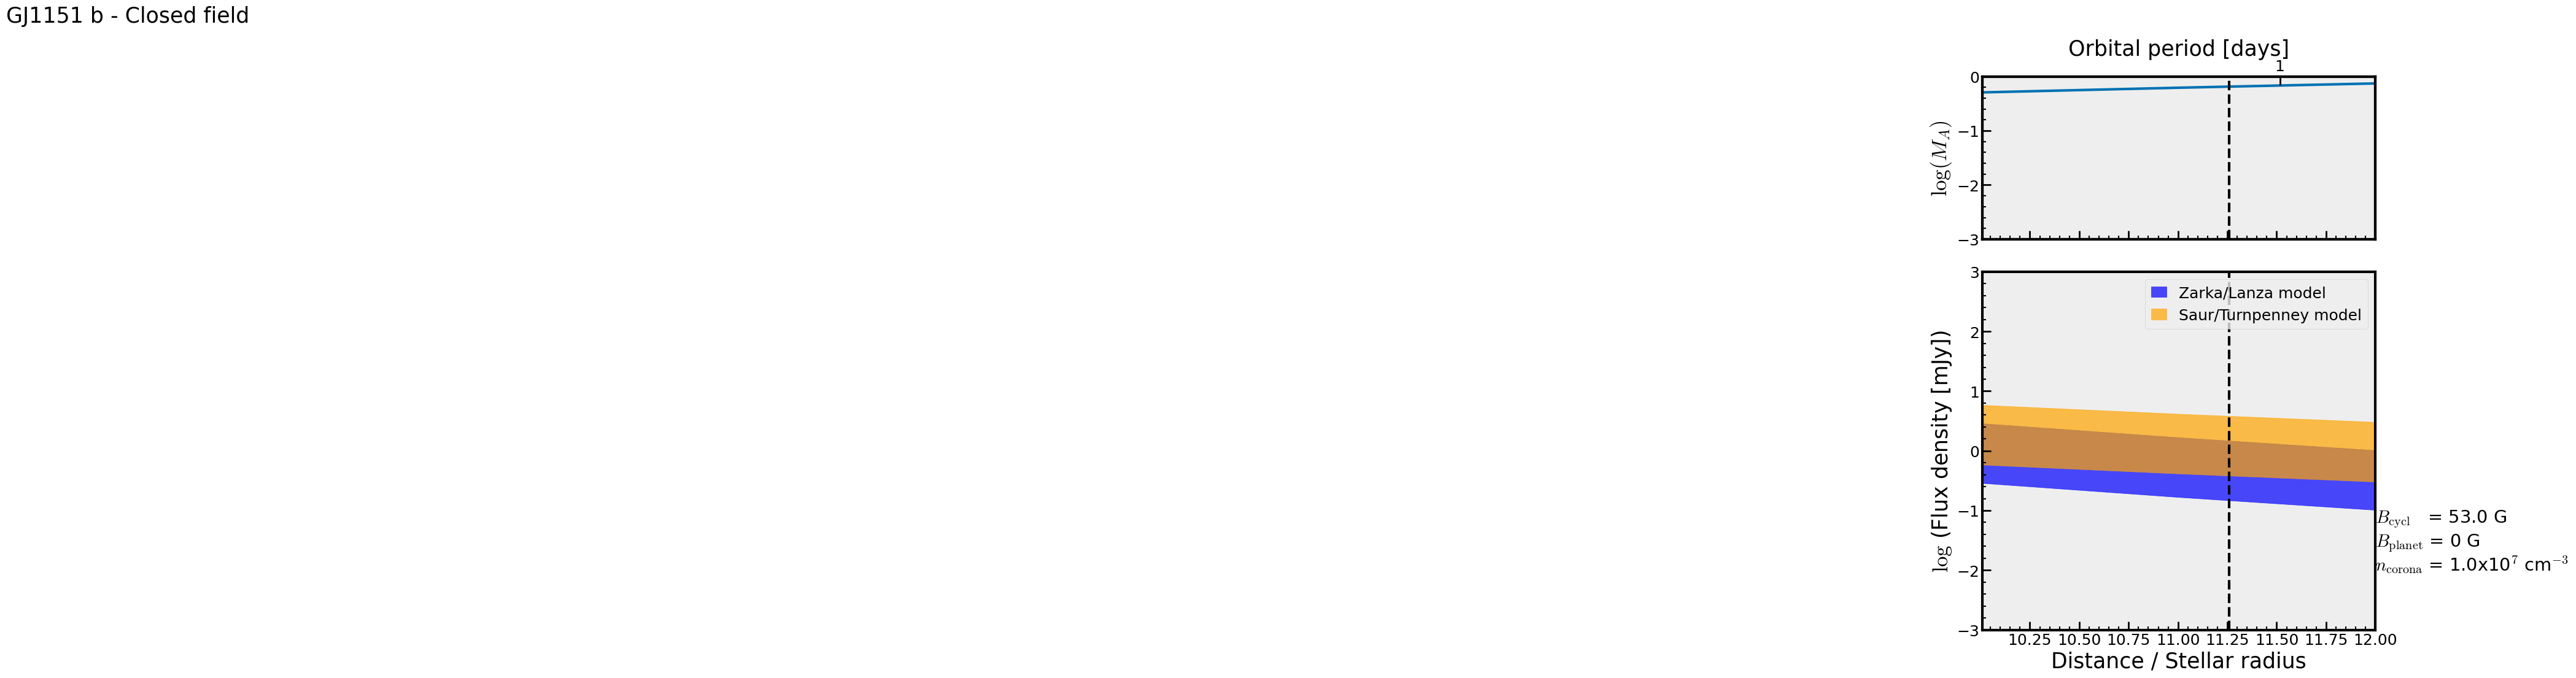

Planetary Magnetic field = 1.0 G
[3.30422232 3.46455328 3.61778576]
 


<ipython-input-17-70d03ddeed39>:381: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


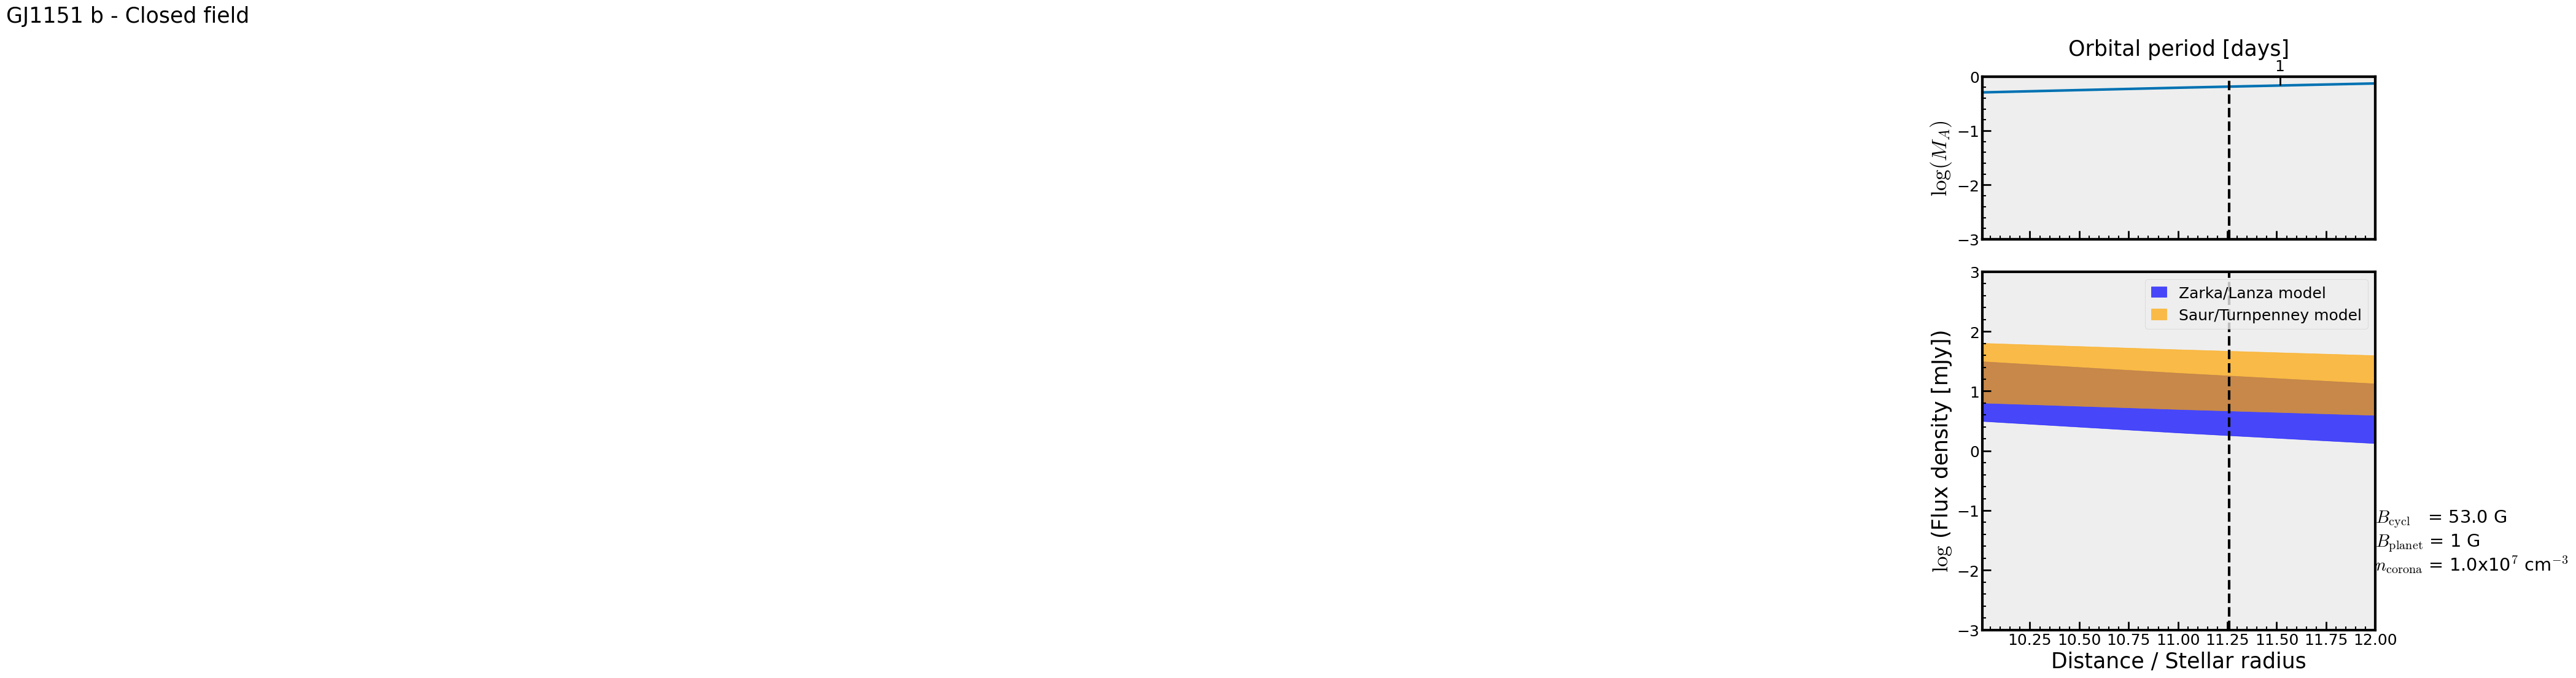

Planetary Magnetic field = 0.0 G
1.0
 


<ipython-input-17-70d03ddeed39>:381: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


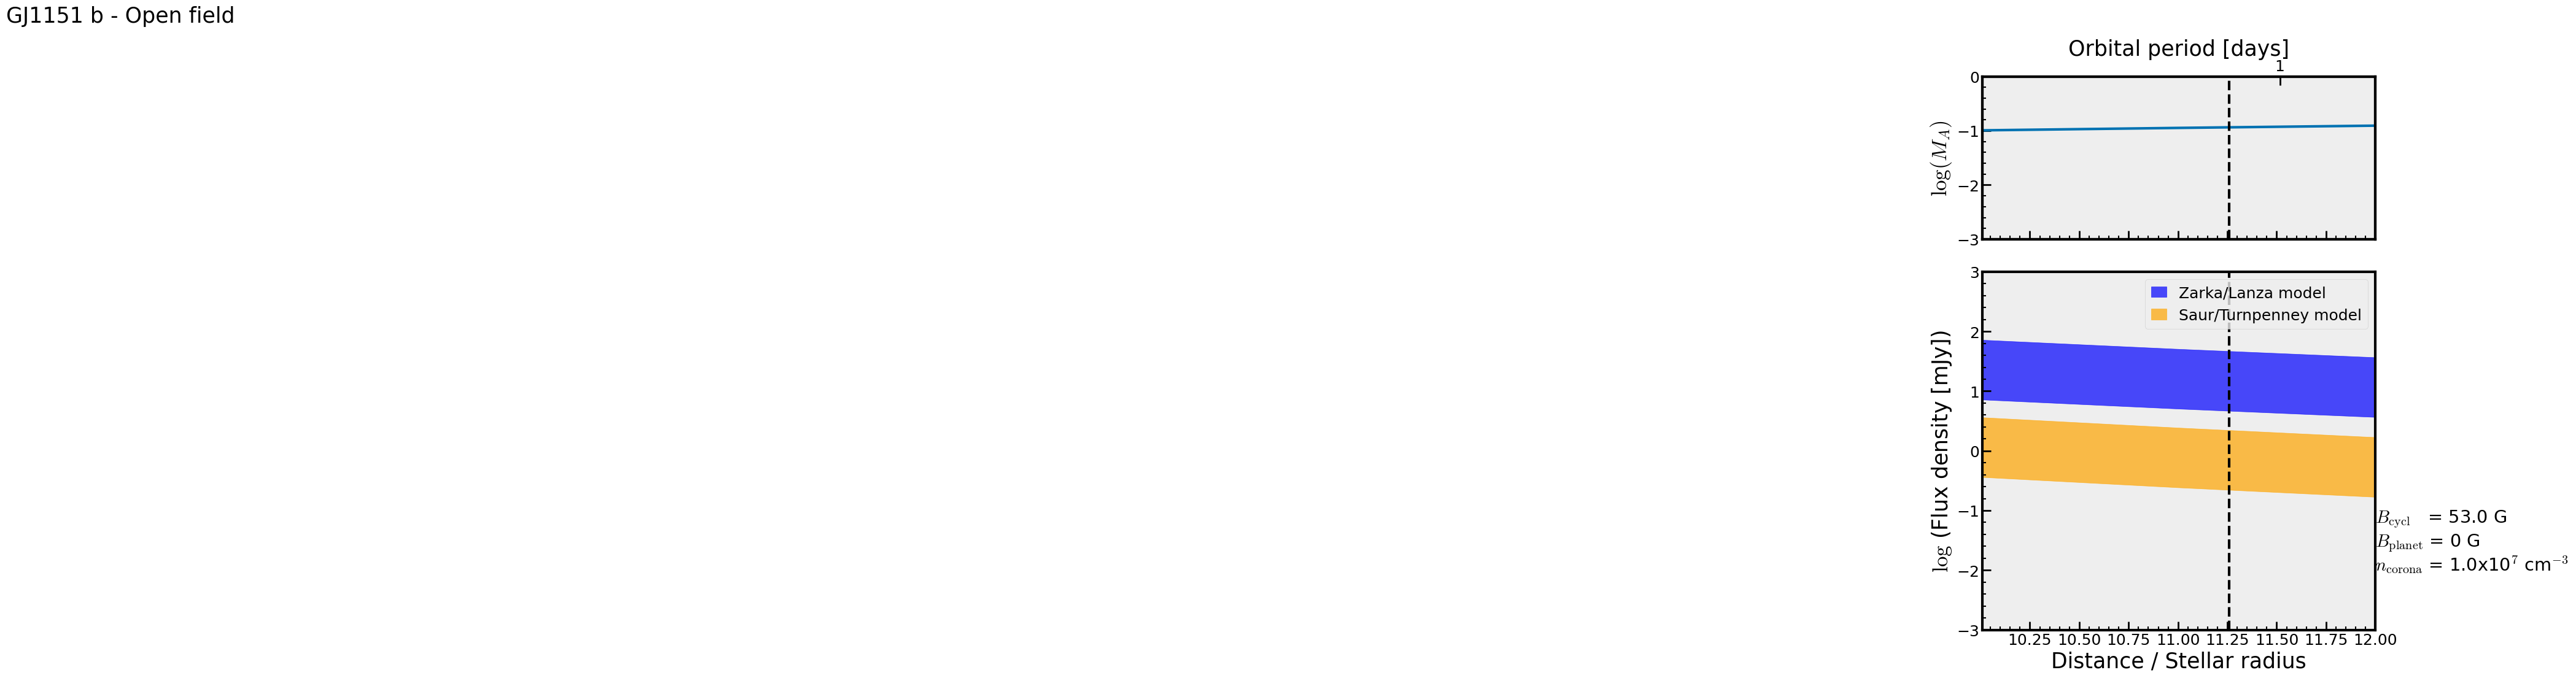

Planetary Magnetic field = 1.0 G
[1.93167531 1.96242652 1.99094173]
 


<ipython-input-17-70d03ddeed39>:381: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


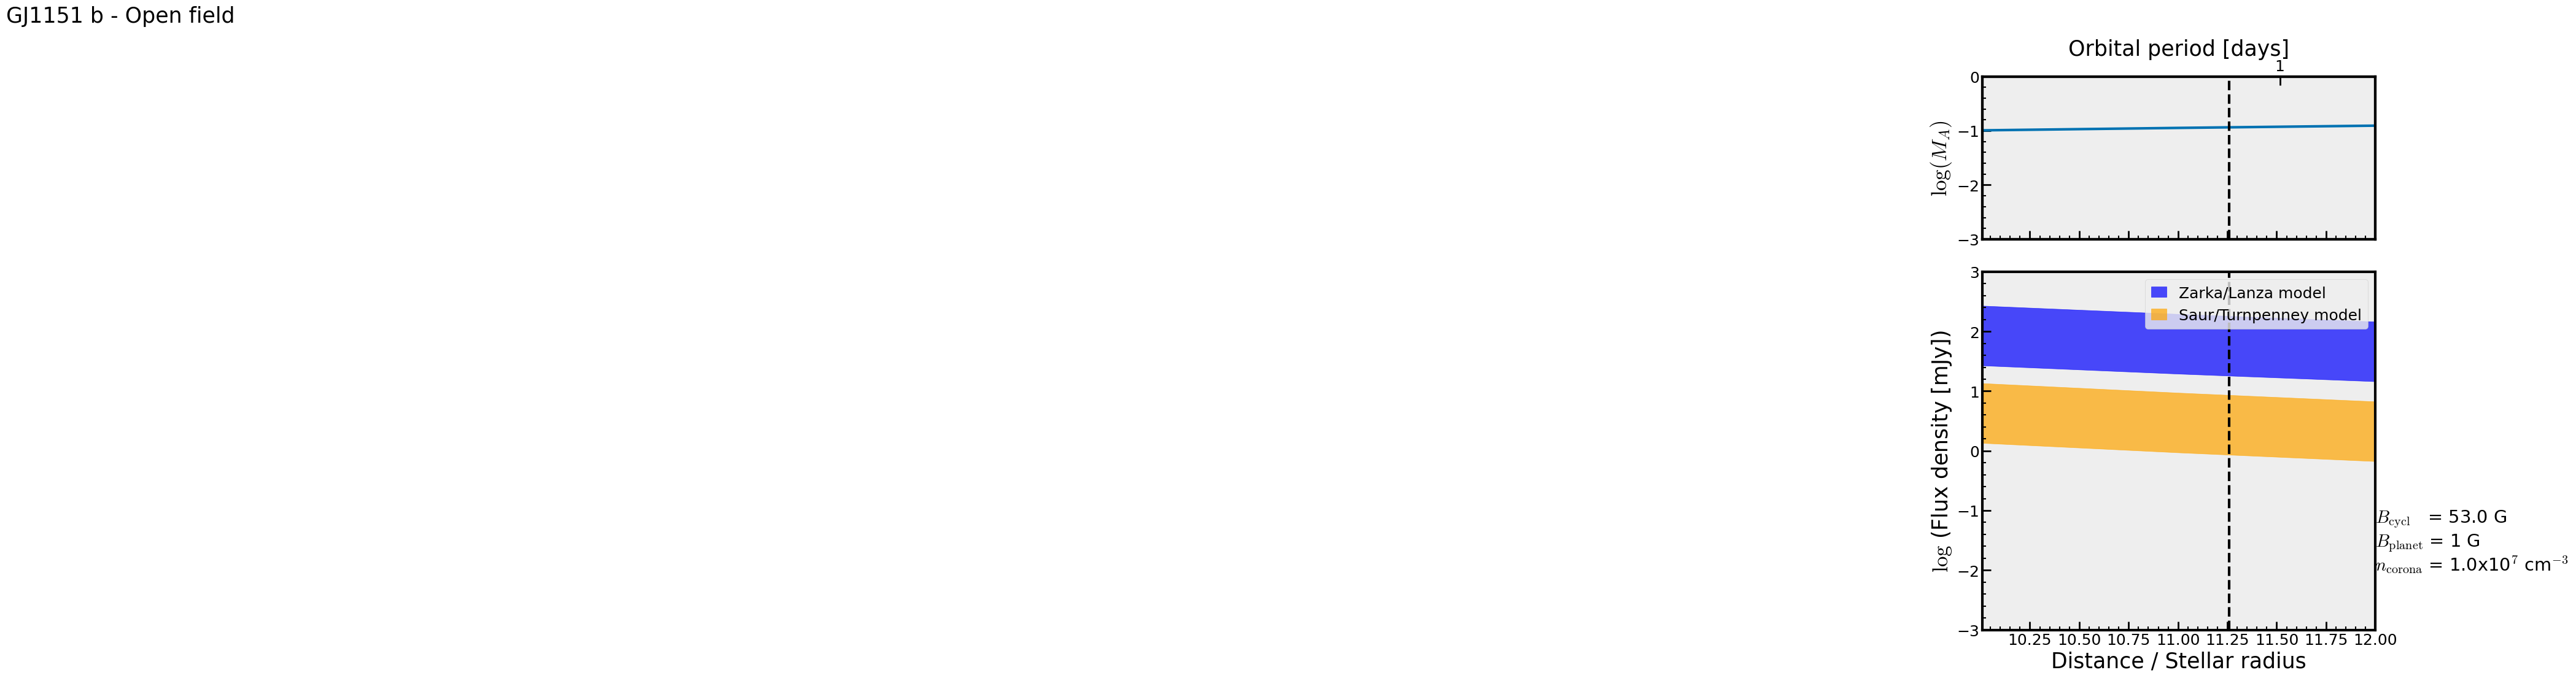

In [17]:
# Setting the stellar magnetic field geometry and the value of the 
# intensity of the planetary magnetic field
# 

# Stellar magnetic field geometry
# The convention is that open_field = 1 => open Parker spiral geometry; 
#  open_field = 0 - closed dipolar geometry

#open_field_arr = [0,1]
#Bp0_arr=[0,1]

open_field_arr = [0, 1]
Bp0_arr= [0, 1]

#for indi in range(len(data)):
#for indi in [90]:
#star_array = [92, 93, 94, 95]
star_array = [89]
for indi in star_array:
    #indi=63
    d      = data['d_pc'][indi] * pc # distance , in  # Bailer-Jones+2018
    R_star = data['star_radius (R_Sun)'][indi] * R_sun # Stellar radius in cm, Maldonado+2017
    M_star = data['star_mass(M_Sun)'][indi] * M_sun # Stellar mass in g,
    P_rot_star = data['P_rot'][indi] *day #Rotation period  of star, in sec
    m = -0.29649; n =  3.54299
    #B0 = int(10**(m * np.log10(P_rot_star/day) + n)) # Stellar surface magnetic field, in Gauss 
    B0 = B_star # Fixed value
    # Planet - Some planet yet to be detected - 
    Exoplanet = data['planet name'][indi]
    Rp = data['planet_radius (R_Earth)'][indi]*R_earth # Planetary radius (educated guess, as it is unknown)
    r_orb  = data['a(AU)'][indi]*au    # orbital distance, in cm
    P_orb = data['orbital_period(days)'][indi] #orbital period of planet, in days

    for ind in open_field_arr:
        for ind1 in Bp0_arr:
            open_field = open_field_arr[ind]
            Bp0 = Bp0_arr[ind1]
            #Bp0 = 0.5 # in Gauss
            # Common properties for star and planet
            # 
            Omega_star = 2.0*np.pi / P_rot_star # Angular rotation velocity of the star
            r_orb_R_star =  r_orb / R_star   # r_orb, in units of R_star (Proxima's radius)
            M_star_msun = M_star / M_sun # Stellar mass in units of solar mass
        
            r_sonic =  G * M_star / (2 * vsound**2) # Radius of sonic point

            #Nsteps = 1000
            #d_orb = np.linspace(1.001, 102, Nsteps) * R_star # Array of (orbital) distances to the star
            Nsteps = 3
            d_orb = np.linspace(10.01, 12, Nsteps) * R_star # Array of (orbital) distances to the star

            v_orb = (G * M_star/d_orb)**0.5 # Orbital speed of planet as f(distance to star), in cm/s

            v_corot = d_orb * Omega_star # Corotation speed (cm/s)

            #
            # The wind speed is computed as in Turnpenney+18
            #
            # using the Lambert W function
            # D_r as in Eq. 18 of Turnpenney+2018, which is taken from eq. 15 in Cranmer 2004

            from scipy.special import lambertw
            D_r = (d_orb/r_sonic)**(-4) * np.exp(4*(1 - r_sonic/d_orb) - 1)
            v_sw2 = np.zeros(len(d_orb), dtype=complex)
            v_sw  = np.zeros(len(d_orb))

            for i in range(len(d_orb)):
                if (d_orb[i]/r_sonic) >= 1.0:
                    v_sw2[i] = -vsound**2 * lambertw(-D_r[i], k=-1)
                else: 
                    v_sw2[i] = -vsound**2 * lambertw(-D_r[i], k=0)
                v_sw[i]  = np.sqrt(v_sw2[i].real)

            v_sw_base = v_sw[0]    # Stellar wind at the closest distance to the star
            
            #print("V_sound = {0:.3f} km/s; V_sw at the base = {1:.3f} km/s".format(vsound/1e5, v_sw_base/1e5))    
            
            # Eq. 23 of Turnpenney+18 - Second term of RHS 
            # The vector v_rel = v_sw - v_orb (Eq. 5 in Saur+13, and see also Fig. 1 in Turnpenney+18)
            # 
            v_rel = np.sqrt(v_orb**2 + v_sw**2) # Relative speed between wind and obstacle
            v_rel_angle = np.arctan(v_orb/v_sw) # Angle between the radial vector and relative velocity

            
            # n_dplanet - Number density at orbital distance to the planet. 
            # If the stellar plasma is assumed to be isothermal, then 
            # the density falls down as ~ R^(-2) * v_sw^(-1).
            #
            # Alternatively, we fix the density at the distance of the planet from the host star.
            #
            if isothermal:
                n_dplanet = n_sw_base * (d_orb/R_star)**(-2) / (v_sw/v_sw_base) # Plasma density at distance (R/R_star)
            else:
                n_dplanet = 1e4  # fixed                 
                
            # Magnetic field geometry

            if open_field: 
                # Open Parker Spiral - Falls down with distances as R^(-2) rather than R^(-3) as in the dipole case
                B_r = B0 * (d_orb/R_star)**(-2) # Stellar wind B-field at (R/R_star), Eqn 20 Turnpenney 2018
                B_phi = B_r * v_corot/v_sw # Azimuthal field (Eqn 21 Turnpenney 2018)
                B_tot = np.sqrt(B_r**2 + B_phi**2) # Total B-field at planet orbital distance

                # Eq. 23 of Turnpenney 2018 -  First term of RHS
                B_ang = np.arctan(B_phi/B_r) # Angle the B-field makes with the radial direction

                # Angle between the stellar wind magnetic field and the impinging plasma velocity
                theta = np.absolute(B_ang - v_rel_angle) # Eqn 23 in Turnpenney 2018

                # theta is the angle between the B_sw (the insterstellar magnetic field), and the
                # incident stellar wind velocity.  See Fig. 1 in Turnpenney+2018
                #
                geom_f = (np.sin(theta))**2 # Geometric factor in efficiency 
            else:
                # Closed, dipolar configuration - It falls with distance as R^(-3)
                # B0 - magnetic field at the magnetic equator on the stellar surface
                # 
                phi = 0. # azimuth, measured from the North magnetic pole of the star (in degrees)
                phi *= np.pi/180. # to radians

                B_r   = -2 * B0 * (d_orb/R_star)**(-3) * np.cos(phi) # Radial component of the dipole magnetic field of the stellar wind as f(distance to star)
                B_phi = - B0 * (d_orb/R_star)**(-3) * np.sin(phi) # Azimuthal component of the dipole magnetic field 
                B_tot = np.sqrt(B_r**2 + B_phi**2) # Total dipole magnetic field 

                geom_f = 1.0 # Geometric factor. 1 for closed dipole configuration, different for the open field configuration

            # Alfven speed and Mach Number
            v_alf = 2.18e11 * B_tot / np.sqrt(n_dplanet) # Alfven speed at the distance of the planet, in cm/s
            M_A = v_rel/v_alf # Alfven mach number
            
            # Planetary magnetic field (as a function of orbital distance)
            #
            # Beware this is not more than an *assumed* dependence, following Kepler's law
            # It could be wrong, or maybe a poor approximation, so 
            # it could/should be checked against the literature
            #
            # Bp0 is the magnetic field at the assumed orbital distance
            #    
            Bp = Bp0 * M_star_msun**(1/2)/(d_orb/au)**(3/2) * (P_orb/yr)
                        
            
            # If we don't use any dependence, then Bp = Bp0
            # Bp = Bp0
            
            #
            # Effective radius of the Alfvén wing, in units of R_p (R_obst in Eq. 57 of Saur+2013, A&A)
            # It depends on the orientation, theta_M, of the intrinsic planetary magnetic field (Bp) 
            # wrt the external magnetic field (B_tot).
            #
            if (Bp0 > 0.0):
                Rp_eff = Rp * np.sqrt(3*np.cos(theta_M/2)) * (Bp/B_tot)**(1./3.)
                Rp_eff[Rp_eff<Rp]=Rp # Rp_eff cannot be smaller than Rplanet

            else:
                Rp_eff = Rp  
            
            print("Planetary Magnetic field = {0:.1f} G".format(Bp0))
            #print("The effective radius is {0:.1e}".format(Rp_eff))
            print(Rp_eff/Rp)
            # 
            # Total Poynting flux, as in Saur+2013 - Eq. 55 (page 7 of 20)
            # Applies if  M_A is small (<< 1)
            #
            # Total Poynting flux (S_mks), in mks units
            S_poynt_mks = 2*np.pi*(Rp_eff/1e2)**2 * (alpha*M_A)**2 *(v_alf/1e2) \
                  * (B_tot/1e4)**2/(4*np.pi*1e-7) * geom_f

            S_poynt = S_poynt_mks * 1e7 # Total Poynting flux, in cgs units (erg/s) 


            # Total Poynting flux, as in Lanza 2009 (Eq. 8) and Zarka 2007 (Eq. 9) 
            # They have a value which is different by a factor 2 * M_A * alpha^2
            # In addition, they include a geometric factor of order 1/2.
            #
            ZL_factor = 0.5
            S_poynt_ZL = S_poynt * ZL_factor / (2 * M_A * alpha**2 * geom_f)
            
            # Beam solid angle covered by the ECM emission
            # It depends on the kinetic energy of electrons (as beta is determined from them), in keV
            #
            #Ekin_min = 10 ; Ekin_max = 511        
            Ekin_min = 20 ; Ekin_max = 200
            #
            def beta_keV(E_kin=511, E_0=511.0):
                """ Computes the velocity of a particle with kinetic energy E_k
                    E_0 - rest mass of the electron
                """ 
                beta = np.sqrt(1 - (1 + E_kin/E_0)**(-2))
                return beta

            beta_min = beta_keV(Ekin_min); beta_max = beta_keV(Ekin_max)
            
            # BEAM SOLID ANGLE
            # We assume an emission cone with half-opening angle theta and angular width d_theta.
            # theta and d_theta are related to the speed of the electrons as theta \approx d_theta \approx v/c = beta
            # 
            # The solid angle, Omega, of a cone with half-opening angle, theta, 
            # is Omega = 2*np.pi * (1. - np.cos(theta))
            # Therefore, a cone sheet with inner half-opening angle, theta, and angular width d_theta
            # has a solid angle Omega = 2*np.pi* ( np.cos (theta - d_theta/2) - np.cos(theta +d_theta/2)) 
            
            #Range of beam solid angles (Omega) for the emitter depends on beta_min and beta_max
            Omega_1 = 2*np.pi * (np.cos(np.arccos(beta_min) - beta_min/2) - np.cos(np.arccos(beta_min) + beta_min/2)) 
            Omega_2 = 2*np.pi * (np.cos(np.arccos(beta_max) - beta_max/2) - np.cos(np.arccos(beta_max) + beta_max/2)) 
            
            # beam solid angle of the emitter / 4*pi 
            # Check why I (MPT) wrote " /4*pi" in the previous line 
            Omega_min = min(Omega_1, Omega_2)
            Omega_max = max(Omega_1, Omega_2)

            
            #print("beta_min of electrons (E_k={0:.1f} keV) = {1:.3f}; \n beta_max of electrons (E_k={2:.1f} keV) = {3:.3f}".\
            #      format(Ekin_min, beta_min, Ekin_max, beta_max))
            #print("Half-opening angle of emission cone: theta_min = {0:.1f} deg; theta_max = {1:.1f} deg".\
            #       format(np.arccos(beta_max)*180./np.pi, np.arccos(beta_min)*180/np.pi))
            #print("(Angular) width of emission cone: theta_min = {0:.1f} deg; theta_max = {1:.1f} deg".\
            #       format(beta_min*180./np.pi, beta_max*180/np.pi))
            #print("solid angles: Min = {0:.3f}; Max = {1:.3f}".format(Omega_min, Omega_max))
            print(" ")

            # in-band radio power received from one whole hemisphere
            power  = 2*np.pi * flux * mJy * d**2 * Delta_nu_obs 

            # The range of allowed powers, considering the beamed solid angle
            # and the possible total bandwidth
            # 
            gyrofreq = e*B0/(2*np.pi * m_e * c)
            Delta_nu_cycl = 0.5 * gyrofreq # width of ECMI emission = (0.5 * gyrofreq)
        
            #Fix flux_min = flux_max = flux
            flux_min = flux_max = flux 

            #
            power_min = power/(2*np.pi) * (flux_min/flux) * Omega_min * Delta_nu_cycl/Delta_nu_obs
            power_max = power/(2*np.pi) * (flux_max/flux) * Omega_max * Delta_nu_cycl/Delta_nu_obs

            # Efficiency factor to convert Poynting flux into ECM radio emission.
            eps_min = 0.01; eps_max = 0.1 

            # Range of values for the star-ward Poynting flux
            Poynt_min = power_min / eps_max 
            Poynt_max = power_max / eps_min 

            #print("In-band power (from 1 whole hemisphere) =  {0:.2e}".format(power))
            #print("power (from 1 sr)  =  {0:.2e}".format(power/2/np.pi * Delta_nu_cycl/Delta_nu_obs))
            #print("power_min =  {0:.2e}; power_max = {1:.2e}".format(power_min, power_max))
            #print("Poynting fluxes: Min = {0:.2e}; Max = {1:.2e}".format(Poynt_min, Poynt_max))
            # Flux density received at Earth (from the theoretically expected Poynting flux)
            # 
            
            Omega = 1.6 # beam solid angle of the ECMI emission, in sterradians.

            # For simplicity, take Omega_min = Omega_max = Omega
            Omega_min = Omega_max = Omega
            
            dilution_factor_min = eps_min / (Omega_max * d**2 * Delta_nu_cycl) 
            dilution_factor_max = eps_max / (Omega_min * d**2 * Delta_nu_cycl)

            # Min and Max expected flux density to be received for Saur-Turnpenney model, in erg/s/Hz/cm2
            Flux_r_S_min = S_poynt * dilution_factor_min
            Flux_r_S_min *= 1e26 # Flux density, in mJy
            Flux_r_S_max = S_poynt * dilution_factor_max
            Flux_r_S_max *= 1e26 # Flux density, in mJy

            # Min and Max expècted flux density to be received for Zarka-Lanza model, in erg/s/Hz/cm2
            Flux_r_S_ZL_min = S_poynt_ZL * dilution_factor_min
            Flux_r_S_ZL_min *= 1e26 # Flux density, in mJy
            Flux_r_S_ZL_max = S_poynt_ZL * dilution_factor_max
            Flux_r_S_ZL_max *= 1e26 # Flux density, in mJy
            ###
            ### Plot received flux density as a function of distance from the star
            ###
            #matplotlib.rc_file_defaults()
            #plt.style.use(['bmh', '/home/torres/Dropbox/python/styles/paper.mplstyle'])

            lw = 3

            # Kepler's third law, with d_orb_mark in units of R_star, 
            # so that period_mark is in days.
            #
            period_mark = np.array([1, 3, 5, 10, 20, 40, 80])
            d_orb_mark = (period_mark/yr)**(2/3) * M_star_msun**(1/3) * (au/R_star)

            # Plot only Flux density vs. orbital distance, or also log(M_A) vs. d_orb 
            multiple = 1
            if multiple:
                plt.figure(figsize=(8,11))
                ax1 = plt.subplot2grid((3,1),(0,0),rowspan=1,colspan=1)
                ax2 = plt.subplot2grid((3,1),(1,0),rowspan=2,colspan=1)
            else:
                plt.figure(figsize=(8,7.5))
                ax2 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1)


            x   = d_orb/R_star # (distance array, in units of R_star)

            y_min = np.log10(Flux_r_S_min) # minimum flux (array), Saur/Turnpenney model
            y_max = np.log10(Flux_r_S_max) # maximum flux (array)
            y_min_ZL = np.log10(Flux_r_S_ZL_min) # minimum flux (array), Zarka/Lanza model
            y_max_ZL = np.log10(Flux_r_S_ZL_max) # maximum flux (array)

            #
            #ax1.plot(x, np.log10(M_A), lw=lw)
            ax1.plot(x, np.log10(M_A), lw=lw)
            #ax2.plot(x, y_min, lw=lw, color='orange', lw=lw, label="Saur/Turnpenney model")
            #ax2.plot(x, y_max, lw=lw, color='orange')
            ax2.fill_between(x, y_min_ZL, y_max_ZL, color="blue", alpha=0.7, label="Zarka/Lanza model")
            ax2.fill_between(x, y_min, y_max,color="orange", alpha=0.7, label="Saur/Turnpenney model")


            #ax2.plot(dvec/R_star,np.log10(Flux_r_S), lw=lw, label="Saur/Turnpenney model")
            #ax2.plot(dvec/R_star,np.log10(Flux_r_S_ZL), lw=lw,label = "Zarka/Lanza model")
            #
            #ax2.fill_between([np.amin(dvec)/R_star,np.amax(dvec)/R_star], \
            #                 [np.log10(Poynt_min),np.log10(Poynt_min)], \
            #                 [np.log10(Poynt_max),np.log10(Poynt_max)],color="orange",alpha=0.4)

            ax11 = ax1.twiny()
            ax11.set_xticks(d_orb_mark)
            ax11.set_xticklabels(period_mark)
            ax11.tick_params(top=False,which='minor')
            ax1.tick_params(top=False,which='both')
            ax1.set_xticklabels([])
            #ax2.tick_params(labeltop=False, labelright=True)


            xmin = np.amin(d_orb)/R_star
            xmax = np.amax(d_orb)/R_star
            

            # Axis limits
            ax11.set_xlim([xmin, xmax])
            ax1.set_xlim([xmin, xmax])
            ax2.set_xlim([xmin, xmax])

            #ax11.set_xlim(5,50)
            #ax1.set_xlim(5,50)
            #ax2.set_xlim(5,50)

            #ax1.set_xscale('log')
            #ax2.set_xscale('log')
            #VALORES ORIGINALES
            ax1.set_ylim([-3,0])
            ax2.set_ylim([-3,3])
            #VALORES TEST
            #ax1.set_ylim([-50,20])
            #ax2.set_ylim([-50,80])

            ax1.axvline(x=r_orb/R_star, ls='--', color='k', lw=3)
            ax2.axvline(x=r_orb/R_star, ls='--', color='k', lw=3)

            #
            ax11.set_xlabel("Orbital period [days]")
            ax2.set_xlabel(r"Distance / Stellar radius")
            ax1.set_ylabel(r"${\rm log} (M_A)$")
            ax2.set_ylabel(r"${\rm log}$ (Flux density [mJy])")

            # draw 3*rms upper limit
            #ax2.axhline(y=np.log10(3*rms), ls='--', color='grey', lw=2)

            ax1.plot([xmin, xmax],[22,22],'k--')
            ax2.legend(loc=1)

            #ax2.text(x=60,y=1.8,s=r"$B_\ast = \,{\rm G}$")
            #ax2.text(x=60,y=1.4,s=r"$B_{\rm pl} = 1 \,{\rm G}$")
            #
            ax2.text(x=12,y=-1.2,s=r"$B_{\rm cycl}$   = " + str(B0) + " G ",fontsize='small')
            ax2.text(x=12,y=-1.6,s=r"$B_{\rm planet}$ = " + str(Bp0) + " G ", fontsize='small')
            ax2.text(x=12,y=-2.0,s=r"$n_{\rm corona}$ = " + str(n_sw_base/1e7) + "x10$^7$ cm$^{-3}$ ", fontsize='small')
            #ax2.text(x=3,y=0.1+np.log10(3*rms),s=r"Requested 3$\sigma$", fontsize='x-small')

            common_string = str(B0)+"G"+"-Bplanet"+str(Bp0)+"G"
            if open_field:
                ax1.text(x=0, y=1, s= Exoplanet + " - Open field")
                outfile = Exoplanet + "-Open-Bstar"+ common_string
            else:
                ax1.text(x=0, y=1, s= Exoplanet + " - Closed field")
                outfile = Exoplanet + "-Closed-Bstar"+ common_string


            plt.tight_layout()
            
            # Variable to send output to files (output=1) or show on the notebook (output = 0) 
            output = 0
            
            if output:
                common_string = str(B0)+"G"+"-Bplanet"+str(Bp0)+"G"
                if open_field:
                    ax1.text(x=0, y=1, s= Exoplanet + " - Open field")
                    out = Exoplanet + "-Open-Bstar"+ common_string
                else:
                    ax1.text(x=0, y=1, s= Exoplanet + " - Closed field")
                    out = Exoplanet + "-Closed-Bstar"+ common_string
                
                
                outfilePDF = os.path.join(outdir, outfile+".pdf")
                
                plt.savefig(outfilePDF)
                plt.close()

            else:
                plt.show()
            
            
            #Print out relevant input and output parameters, including the expected flux received at Earth 
            # from the SPI at the position of the planet
            # To this end, first find out the position of the planet in the distance array
            d_diff = np.abs((d_orb-r_orb)/R_star)
            loc_pl = np.where(d_diff == d_diff.min())

            outfileTXT = os.path.join(outdir, outfile+'.txt')
            with open(outfileTXT, 'w') as f:
                f.write('# INPUT PARAMETERS:\n #########') 
                f.write('B_star = {0:.0f} G; B_planet = {1:.0f} G\n; '.format(B0, Bp0))
                f.write('# T_corona = {0:.0e} K'.format(T_corona))
                f.write('Stellar wind particle density at the base = {0:.0e} cm-3\n;'.format(n_sw_base))
                f.write('# OUTPUT PARAMETERS: \n ########')
                f.write('ECMI freq (fundamental) = {0:.0f} MHz\n'.format(gyrofreq/1e6))
                f.write('Flux_ST: ({0}, {1}) mJy;'.format(Flux_r_S_min[loc_pl], Flux_r_S_max[loc_pl]))
                f.write('Flux_ZL: ({0}, {1}) mJy'.format(Flux_r_S_ZL_min[loc_pl], Flux_r_S_ZL_max[loc_pl]))
            